In [1]:
import os
import cv2


In [2]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt


In [3]:

from scipy.spatial import distance

import warnings

warnings.filterwarnings('ignore')

In [4]:
import face_recognition 

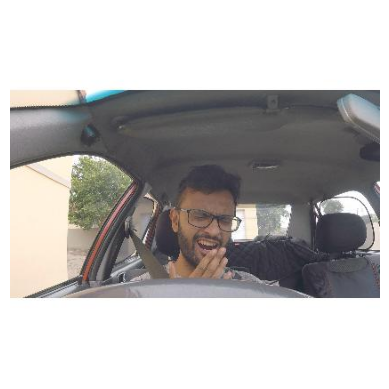

In [15]:
image_path='test2.jpg'
image=Image.open(image_path)
plt.axis('off')
plt.imshow(image)

In [17]:
def highlight_fac_part(image_path):
    image_bgr = cv2.imread(image_path)

    if image_bgr is None:
        print("Error: Unable to read the image. Check the file path.")
        return

    image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

    face_locations = face_recognition.face_locations(image_rgb, model='cnn')

    for face_location in face_locations:
        landmarks = face_recognition.face_landmarks(image_rgb, [face_location])[0]

        for landmark_type, landmark_points in landmarks.items():
            for (x, y) in landmark_points:
                cv2.circle(image_rgb, (x, y), 1, (0, 255, 0),-1)

    plt.figure(figsize=(6, 6))
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()

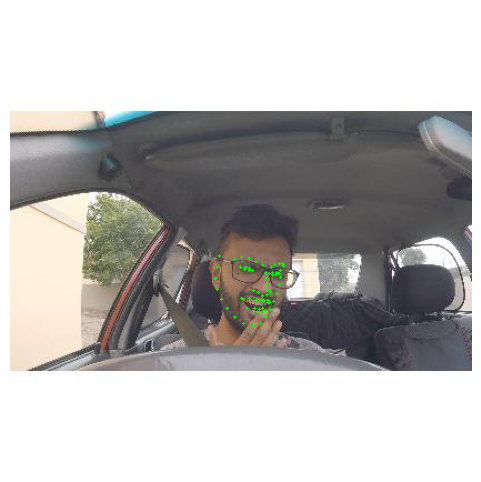

In [18]:
highlight_fac_part(image_path)

In [6]:
def eye_aspect_ratio(eye):
 A = distance.euclidean(eye[1], eye[5])
 B = distance.euclidean(eye[2], eye[4])
 C = distance.euclidean(eye[0], eye[3])
 ear = (A + B) / (2.0 * C)
 return ear
def mouth_aspect_ratio(mouth):
 A = distance.euclidean(mouth[2], mouth[10])
 B = distance.euclidean(mouth[4], mouth[8])
 C = distance.euclidean(mouth[0], mouth[6])
 mar = (A + B) / (2.0 * C)
 return mar




In [7]:
def process_image(frame):
    # define thresholds
    EYE_AR_THRESH = 0.25
    MOUTH_AR_THRESH = 0.6

    if frame is None:
        raise ValueError('Image is not found or unable to open')

    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # find all face Locations
    face_locations = face_recognition.face_locations(rgb_frame)

    # initiate flags
    eye_flag = mouth_flag = False
    for face_location in face_locations:
    # extract facial Landmarks
     landmarks = face_recognition.face_landmarks(rgb_frame, [face_location])[0]

    # extract eye and mouth coordinates
     left_eye = np.array(landmarks['left_eye'])
     right_eye = np.array(landmarks['right_eye'])
     mouth = np.array(landmarks['bottom_lip'])

    # calculate ear and mar
     left_ear = eye_aspect_ratio(left_eye)
     right_ear = eye_aspect_ratio(right_eye)
     ear = (left_ear + right_ear) / 2.0
     mar = mouth_aspect_ratio(mouth)

     #check if eye are closed
     if ear<EYE_AR_THRESH:
        eye_flag=True
     #check for yawning
     if mar>MOUTH_AR_THRESH:
        mouth_flag=True
    return eye_flag,mouth_flag         

In [8]:
img=cv2.imread(image_path)
process_image(img)

NameError: name 'image_path' is not defined

Real time drowsiness detection

In [9]:
# video_path = "ac.mp4"
# video_cap = cv2.VideoCapture(0) # for getting frames from the webcam
# video_cap = cv2.VideoCapture(video_path)
import cv2

video_cap = cv2.VideoCapture(0)  # Capture from webcam
count = score = 0

while True:
    success, image = video_cap.read()
    if not success:
        break

    image = cv2.resize(image, (800, 500))

    count += 1
    n = 5  # Process every nth frame
    if count % n == 0:
        eye_flag, mouth_flag = process_image(image)

        if eye_flag or mouth_flag:
            score += 1  # Increase score immediately
        else:
            # score -=2  # Reset to normal immediately
            # if score<0:
             score=0
    # Display score
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(image, f"Score: {score}", (10, image.shape[0] - 10), font, 1, (0, 255, 0), 2, cv2.LINE_AA)

    # Show "Drowsy" alert as soon as the threshold is reached
    if score >= 2:
        cv2.putText(image, "Drowsy", (image.shape[1] - 130, 40), font, 1, (0, 0, 255), 2, cv2.LINE_AA)

    cv2.imshow('drowsiness detection', image)

    # Exit if any key is pressed
    if cv2.waitKey(1) & 0xFF != 255:
        break

video_cap.release()
cv2.destroyAllWindows()

               

KeyboardInterrupt: 